<a href="https://colab.research.google.com/github/Hristo2076/ml_processes/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Цель:** изучить применение дерева решений в рамках задачи регрессии


In [98]:
#import
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets, tree
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn.metrics import mean_squared_error


1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую).
2. Проведите первичный анализ.
  1. Проверьте данные на пропуски. Удалите в случае обнаружения.
  2.*Нормализуйте один из признаков.
3. Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.
4. Обучите модель регрессии на обучающем множестве.
5. Для тестового множества предскажите целевую переменную и сравните с истинным значением, посчитав точность предсказания модели. Для этого используйте встроенную функцию score.

In [60]:

data = datasets.fetch_california_housing()
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [61]:
X = pd.DataFrame(data= data.data, columns=data.feature_names)    
y = pd.DataFrame(data=data.target,columns=data.target_names)
df = pd.concat([X,y],axis=1)
df.head()
     

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [62]:
df.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [63]:
df.Population.describe()

count    20640.000000
mean      1425.476744
std       1132.462122
min          3.000000
25%        787.000000
50%       1166.000000
75%       1725.000000
max      35682.000000
Name: Population, dtype: float64

In [64]:
#normilize MinMaxScaler
df.Population=(df.Population-df.Population.min())/(df.Population.max()-df.Population.min())
df.Population.describe()

count    20640.000000
mean         0.039869
std          0.031740
min          0.000000
25%          0.021974
50%          0.032596
75%          0.048264
max          1.000000
Name: Population, dtype: float64

In [65]:
X = df.drop('MedHouseVal',axis=1)
y = df.MedHouseVal

def train(X,y):
  X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                   random_state=42,
                                                   test_size=0.25)
  return X_train,X_test,y_train,y_test

In [66]:
X_train,X_test,y_train,y_test = train(X,y)

In [67]:
model = LinearRegression()

model.fit(X_train,y_train)
model.score(X_test,y_test)

0.5910509795491352

In [68]:
y_pred = model.predict(X_test)
d = {'true':y_test,
     'pred':y_pred}
predicts = pd.DataFrame(data=d)
predicts[:10]

,true,pred
20046,0.47700,0.724128
3024,0.45800,1.766778
15663,5.00001,2.711516
20484,2.18600,2.836012
9814,2.78000,2.603755
13311,1.58700,2.011968
7113,1.98200,2.640159
7668,1.57500,2.166153
18246,3.40000,2.746566
5723,4.46600,3.904158


In [69]:
mean_squared_error(y_test,y_pred,squared=False)

0.7356145375446769

6. Обучите дерево решений на обучающем множестве.
   1. Повторите п. 5 для полученной модели.
  2. Визуализируйте часть дерева решений. Убедитесь, что график получился читабельным. Посмотрите примеры визуализации по ссылке.
7. Оптимизируйте глубину дерева (max_depth). *Оптимизируйте ещё один параметр модели на выбор.
  1. Повторите п. 5 для полученной модели.
1


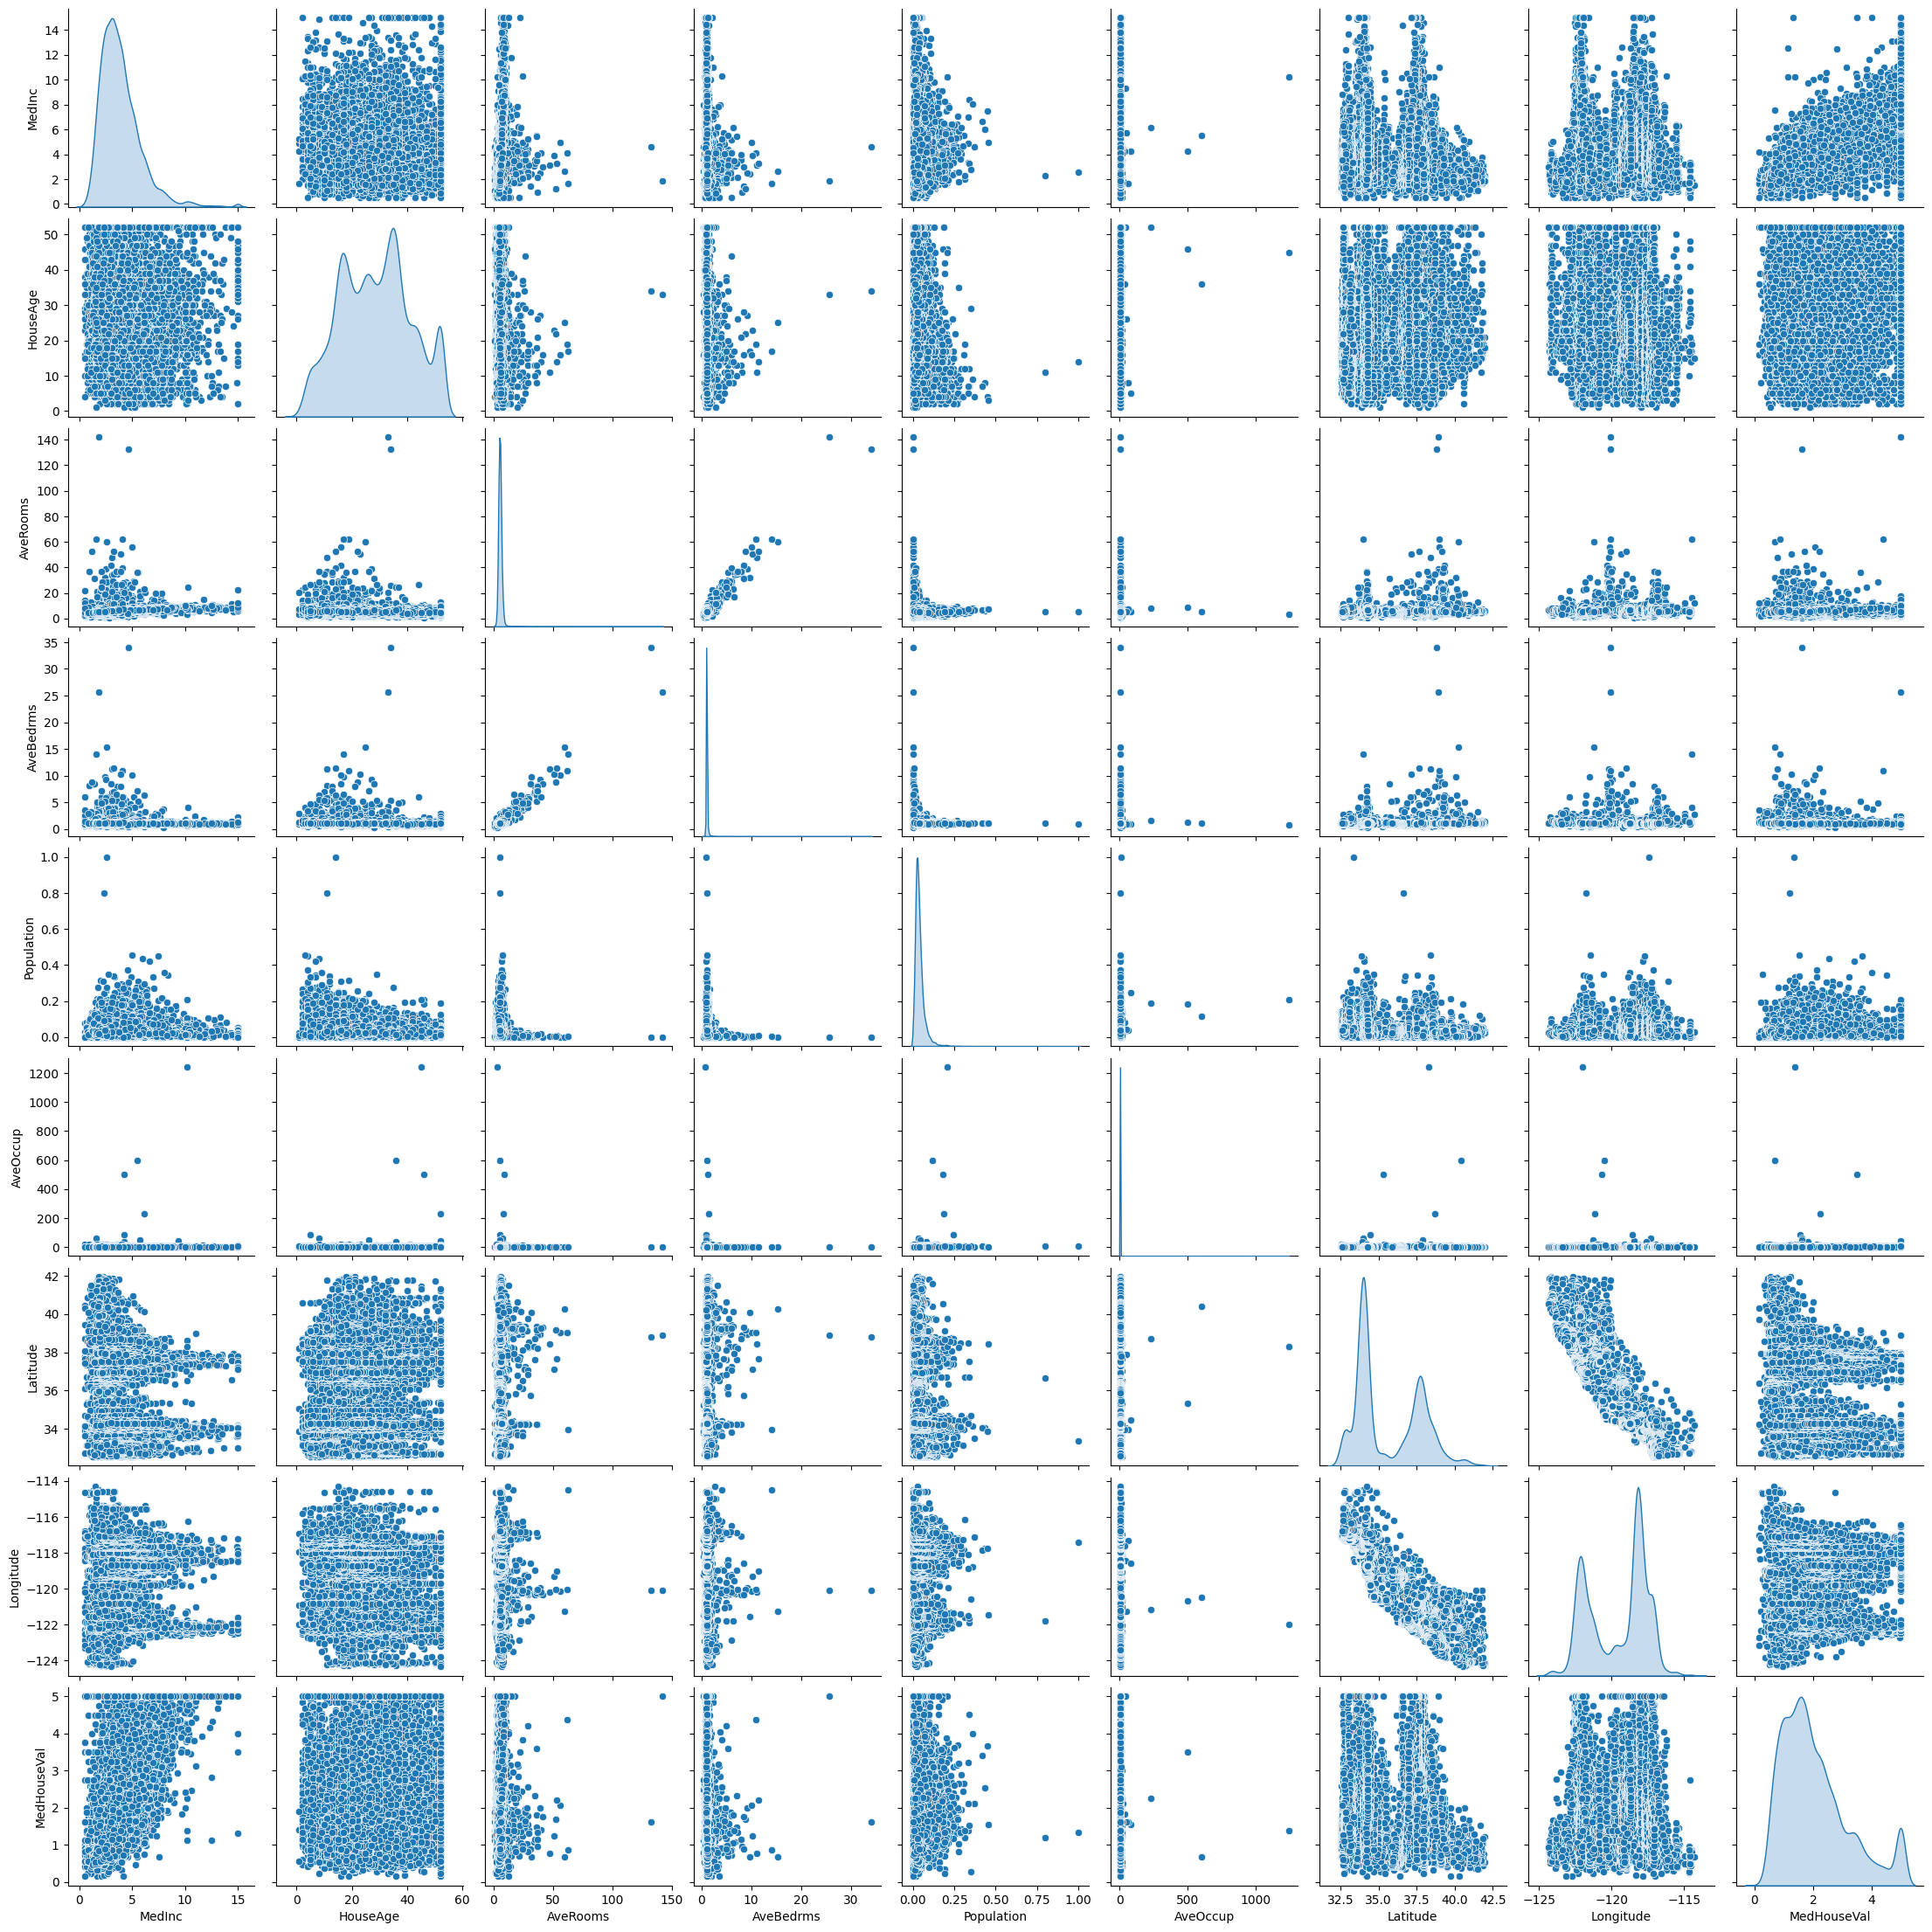

In [54]:
sns.pairplot(df,diag_kind='kde')

In [76]:
model_tree = DecisionTreeRegressor(max_depth=4)

model_tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=4)

In [77]:
y_pred = model_tree.predict(X_test)

In [78]:
mean_squared_error(y_test,y_pred,squared=False)

0.7571590210474511

In [80]:
model_tree.score(X_test,y_test)

0.5667458138420973

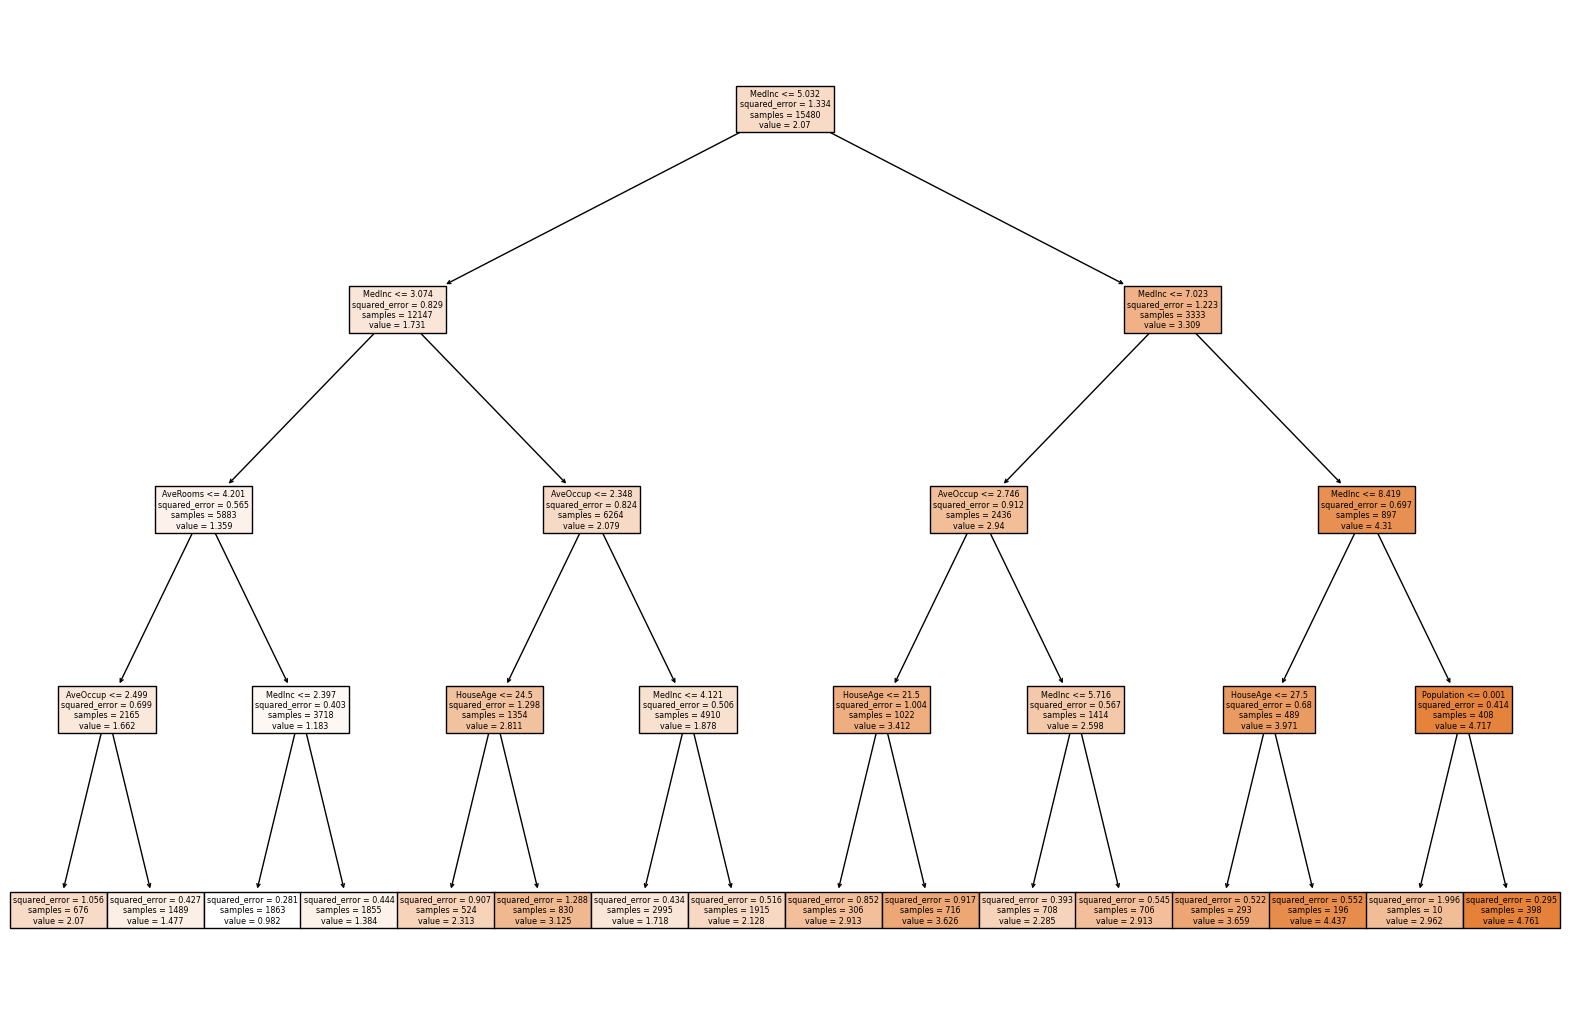

In [94]:
fig = plt.figure(figsize=(20,13))
tree.plot_tree(model_tree, feature_names=df.columns, filled=True)
plt.show()

In [91]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
pipe = Pipeline(steps=[('Scaler',StandardScaler()),
                ('tree',DecisionTreeRegressor(max_depth=2))])

pipe.fit(X_train,y_train)

Pipeline(steps=[('Scaler', StandardScaler()),
                ('tree', DecisionTreeRegressor(max_depth=2))])

In [95]:
pipe.score(X_test,y_test)

0.43088594895460397

[Text(0.5, 0.8333333333333334, 'MedInc <= 0.606\nsquared_error = 1.334\nsamples = 15480\nvalue = 2.07'),
 Text(0.25, 0.5, 'MedInc <= -0.422\nsquared_error = 0.829\nsamples = 12147\nvalue = 1.731'),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.565\nsamples = 5883\nvalue = 1.359'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.824\nsamples = 6264\nvalue = 2.079'),
 Text(0.75, 0.5, 'MedInc <= 1.652\nsquared_error = 1.223\nsamples = 3333\nvalue = 3.309'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.912\nsamples = 2436\nvalue = 2.94'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.697\nsamples = 897\nvalue = 4.31')]

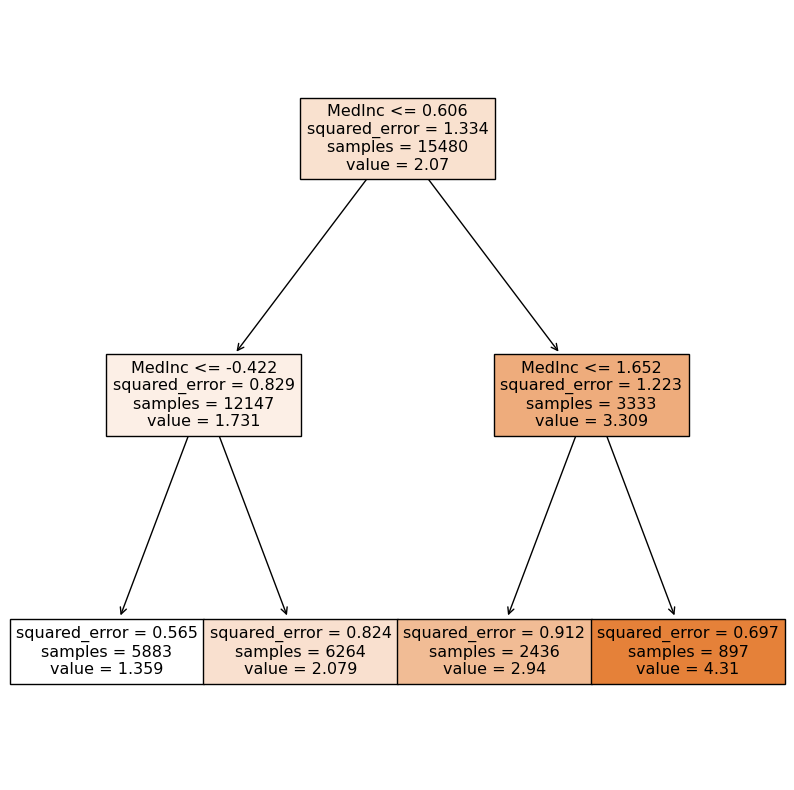

In [96]:
fig = plt.figure(figsize=(10,10))
tree.plot_tree(pipe.named_steps['tree'], feature_names=df.columns, filled=True)

8. Cформулируйте выводы по проделанной работе.
  1. Сравните точность двух моделей.
  2. Напишите свое мнение, для каких задач предпочтительнее использовать обученные в работе модели? Какие у них есть плюсы и минусы?

In [103]:
data = {'model':model.score(X_test,y_test),
        'model_tree':model_tree.score(X_test,y_test),
        'pipe_model': pipe.score(X_test,y_test)}

res = pd.DataFrame(data=data,index=range(1))
res

,model,model_tree,pipe_model
0,0.591051,0.566746,0.430886
